In [2]:
from scipy.stats import semicircular
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
%matplotlib inline

# Полукруговое распределение Вигнера
Почитать про него можно [здесь](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%83%D0%BA%D1%80%D1%83%D0%B3%D0%BE%D0%B2%D0%BE%D0%B9_%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD_%D0%92%D0%B8%D0%B3%D0%BD%D0%B5%D1%80%D0%B0).

Возьмем при $$R=1$$
Среднее: $$E[x]=0$$
Дисперсия: $$D[x]=R^2/4=1/4$$


In [3]:
EX=0
DX=1/4

## Построим гистограмму по выборке объемом = 1000 и функцию плотности

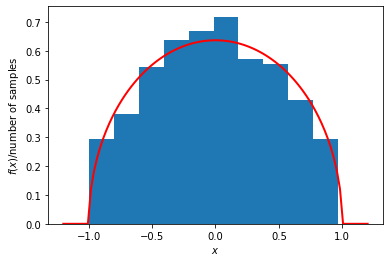

In [4]:
fig, ax = plt.subplots(1, 1) 
x = np.linspace(-1.2,1.2, 100)
ax.plot(x, semicircular.pdf(x),'r-', lw=2)  #график функции плотности при x=[-1.2,1.2]
r = semicircular.rvs(size=1000) #получаем выборку объемом 1000
ax.hist(r, density=True) #строим гистограмму
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$/number of samples')
plt.show()

## Генерируем 1000 выборок объема n, строим для выборочного среднего гистограммы, строим график плотности нормального распределения по центральной предельной теореме

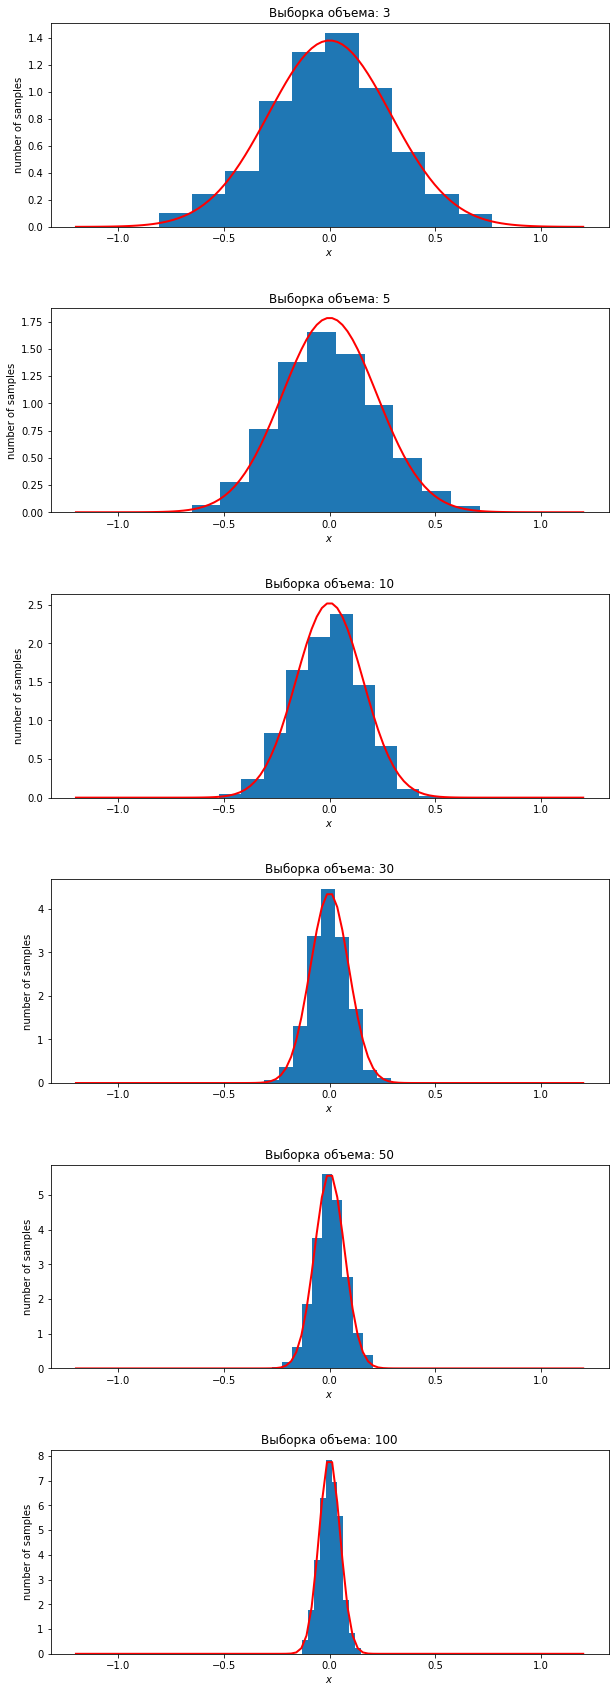

In [5]:
fig, ax = plt.subplots(6, 1,figsize=(10, 30))
k=0
for n in [3,5,10,30,50,100]:  #выборки объема n=3,5,10,30,50,100
    mean=[]
    for i in range(1000): #генерируем 1000 выборок
        mean.append(np.sum(semicircular.rvs(size=n))/n) #для каждой выборки находим выборочное среднее и добавляем в массив
    ax[k].hist(mean,density=True) #строим гистограмму для выборочных средних для выборки объема n
    norm=sts.norm(EX,np.sqrt(DX/n)) #нормальное распределение с mu=EX и sigma=sqrt(DX/n)
    ax[k].plot(x, norm.pdf(x),'r-', lw=2) #график плотности нормального распределения
    ax[k].set(title='Выборка объема: ' + str(n))
    ax[k].set_xlabel('$x$')
    ax[k].set_ylabel('number of samples')
    k+=1
    
fig.subplots_adjust(hspace=0.4)
    
plt.show()

При увеличении объема выборки наблюдается увеличение точности апроксимации выборочного среднего значения. 
Однако скорость схождения довольно высока, и уже при малых n, точность достаточно высока.